
### SAT Scores ---- Drug-Use.

---

High school education outcomes, or drug abuse in the community.
Two national datasets: one on SAT scores by state, and one on drug use by age. 

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions.

#### Package imports

In [5]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.datasets import load_iris
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'



## Load the `sat_scores.csv` dataset and EDA

---

In [27]:
#loading the csv file into the dataframe

sat_scores_df = pd.read_csv('./data/sat_scores.csv')
sat_scores_df.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [28]:
sat_scores_df.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

In [4]:
sat_scores_df["State"].head()

0    CT
1    NJ
2    MA
3    NY
4    NH
Name: State, dtype: object

In [5]:
sat_scores_df.shape


(52, 4)

In [6]:
sat_scores_df.describe()#(include=all)

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


In [7]:
sat_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [8]:
#to select the rows and columns by indexing
sat_scores_df.iloc[[20,30,45],[2,3]]

,Verbal,Math
20,493,499
30,543,542
45,562,550


In [162]:
# names of columns
sat_scores_df.columns

Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object')

In [163]:
#Accessing a specific column,use bracket syntax just like you would with Python dictionaries,
#using the column's string name to extract it.
#sat_scores_df[["State"]].head()

In [33]:
sat_scores_df["State"].describe()

count     52
unique    52
top       SD
freq       1
Name: State, dtype: object

In [32]:
sat_scores_df[["State","Rate"]].head(2)

,State,Rate
0,CT,82
1,NJ,81


In [174]:
data_dict = {
    "State":{"type":"object", "DECR": "state's initials","shape":"(52,4)"},
    "Rate":{"type":"int", "DECR": "high school outcome rate","shape":"(52,4)"},
    "Verbal":{"type":"int", "DECR": "high school verbal score","shape":"(52,4)"},
    "Math":{"type":"int", "DECR": "high school math score","shape":"(52,4)"},
}

In [175]:
print data_dict

{'Math': {'shape': '(52,4)', 'type': 'int', 'DECR': 'high school math score'}, 'State': {'shape': '(52,4)', 'type': 'object', 'DECR': "state's initials"}, 'Rate': {'shape': '(52,4)', 'type': 'int', 'DECR': 'high school outcome rate'}, 'Verbal': {'shape': '(52,4)', 'type': 'int', 'DECR': 'high school verbal score'}}


## Plot the data using seaborn

---

### Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

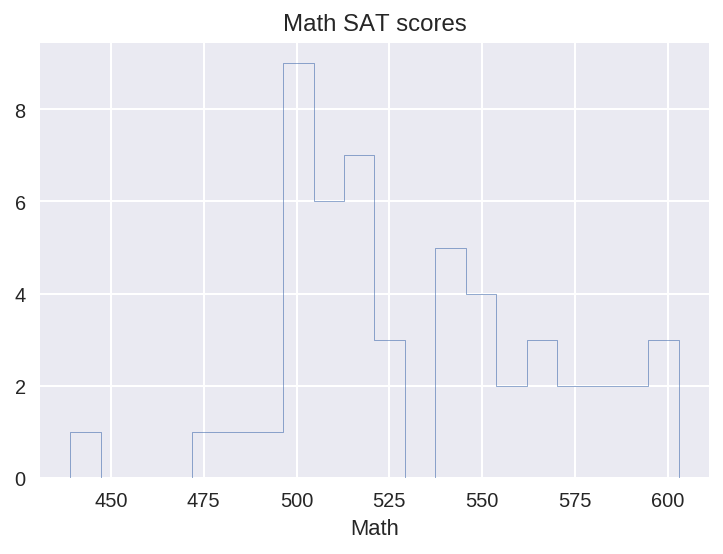

In [16]:
x= sat_scores_df["Math"]
plt.hist(x, bins=20 ,histtype= "step")
plt.xlabel("Math")
plt.title("Math SAT scores")
plt.show()

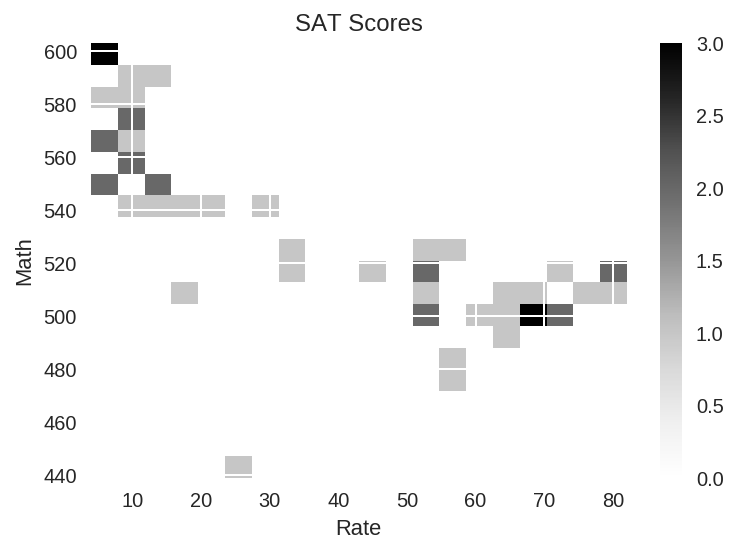

In [23]:
x= sat_scores_df["Rate"]
y= sat_scores_df["Math"]

plt.hist2d(x, y, bins = (20,20))
plt.colorbar()
plt.xlabel("Rate")
plt.ylabel("Math")
plt.title("SAT Scores")
plt.show()


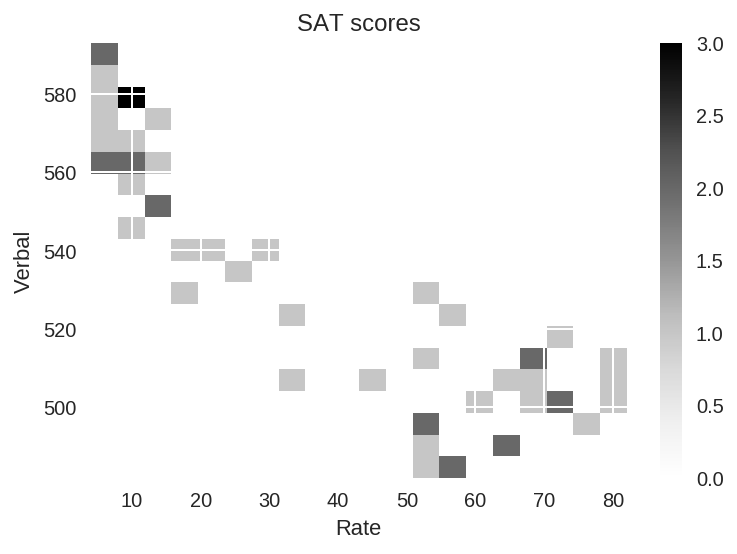

In [24]:
yv= sat_scores_df['Verbal']

plt.hist2d(x,yv, bins=(20,20))
plt.colorbar()
plt.xlabel("Rate")
plt.ylabel("Verbal")
plt.title("SAT scores")
plt.show()

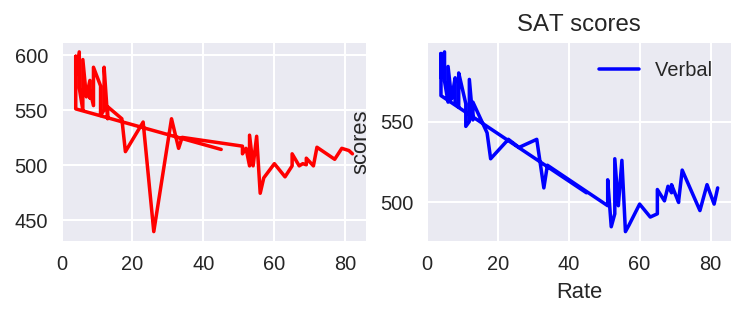

In [21]:
x1= sat_scores_df["Rate"]
y1= sat_scores_df["Math"]
y2= sat_scores_df["Verbal"]
plt.subplot(2,2,1)
plt.plot(x1,y1,color= "red", label= "Math")

plt.subplot(2,2,2)
plt.plot(x1,y2, color="blue", label= "Verbal")
plt.legend(loc="bottom right")
plt.xlabel("Rate")
plt.ylabel("scores")
plt.title("SAT scores")
plt.show()

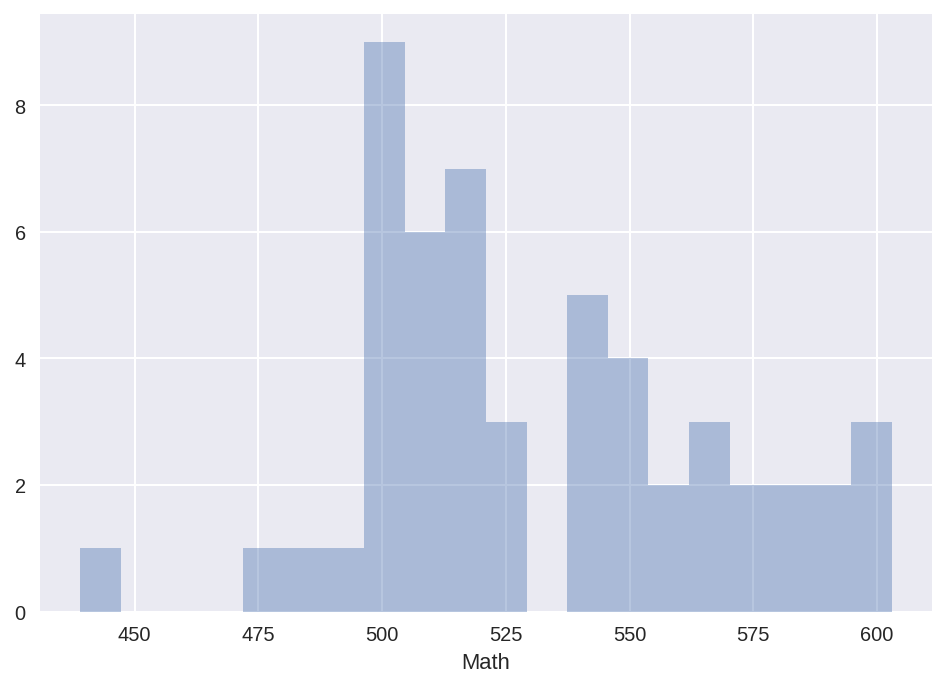

In [181]:
sns.set() 
x = sat_scores_df["Math"]
ax = sns.distplot(x, kde=False, bins=20)

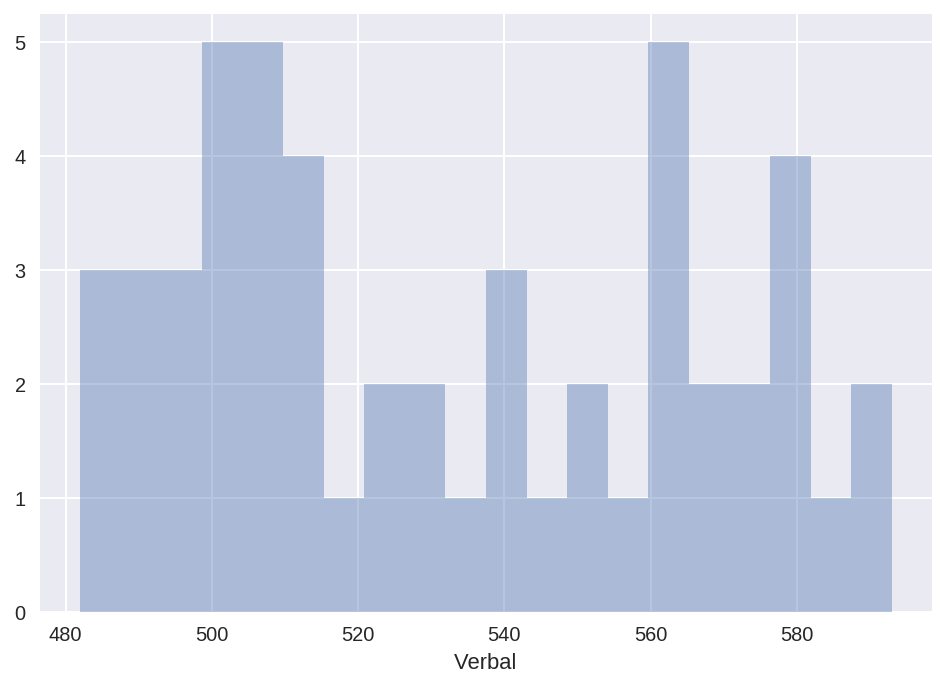

In [182]:
sns.set()
x = sat_scores_df["Verbal"]
ax = sns.distplot(x , kde = False, bins=20)

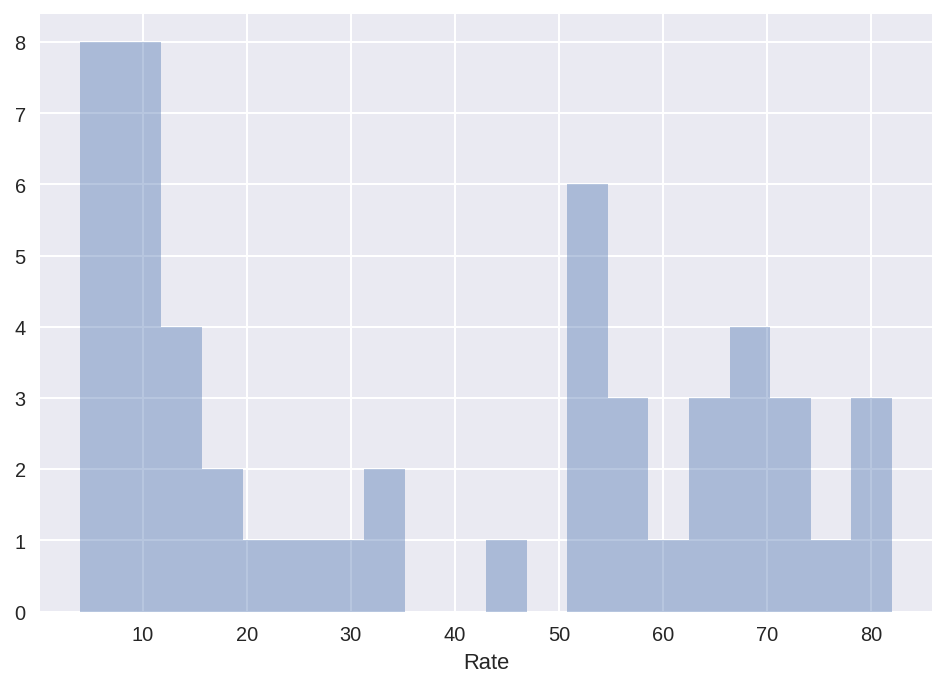

In [183]:
sns.set()
x = sat_scores_df["Rate"]
ax = sns.distplot(x, kde = False, bins=20)

### Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

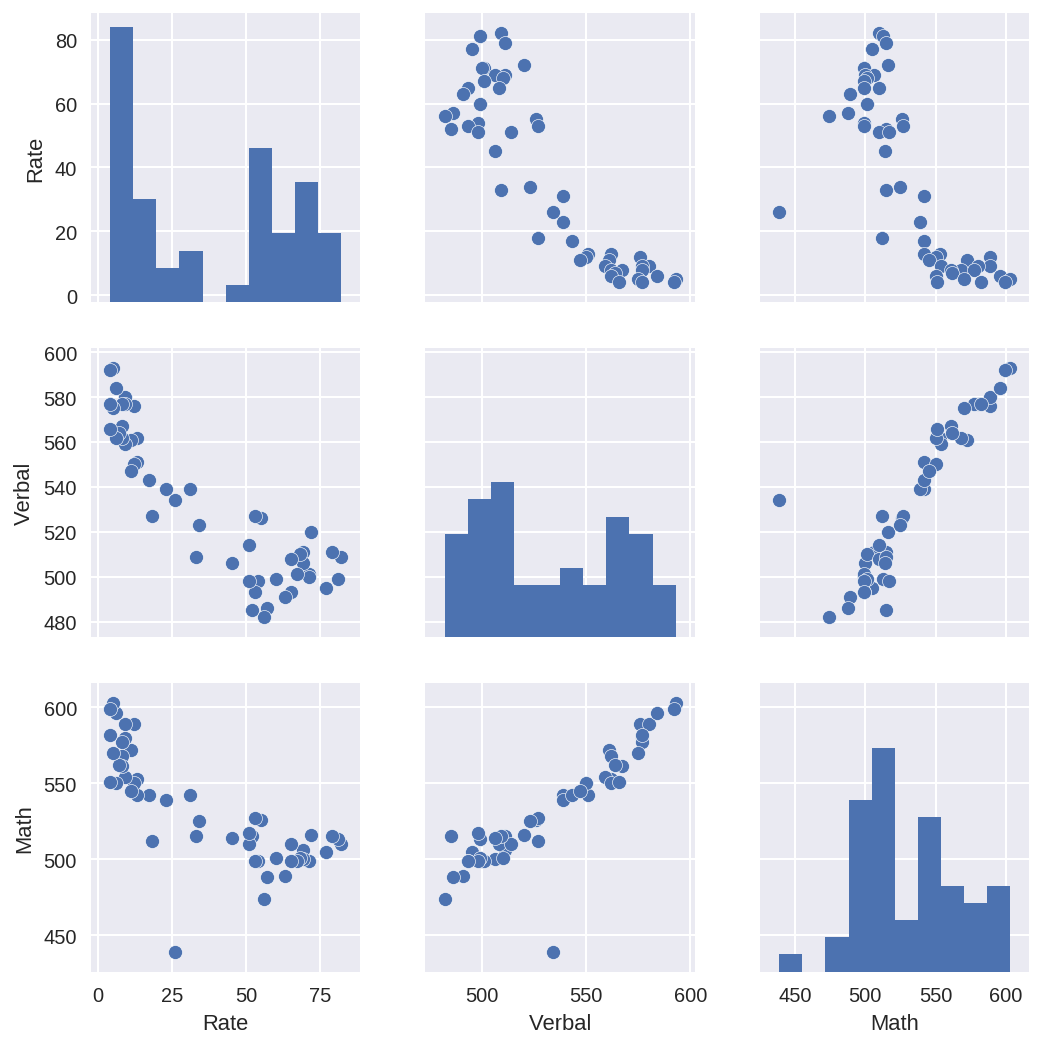

In [187]:
_ = sns.pairplot(sat_scores_df)

## Plot the data using built-in pandas functions.


### Plot a stacked histogram with `Verbal` and `Math` using pandas

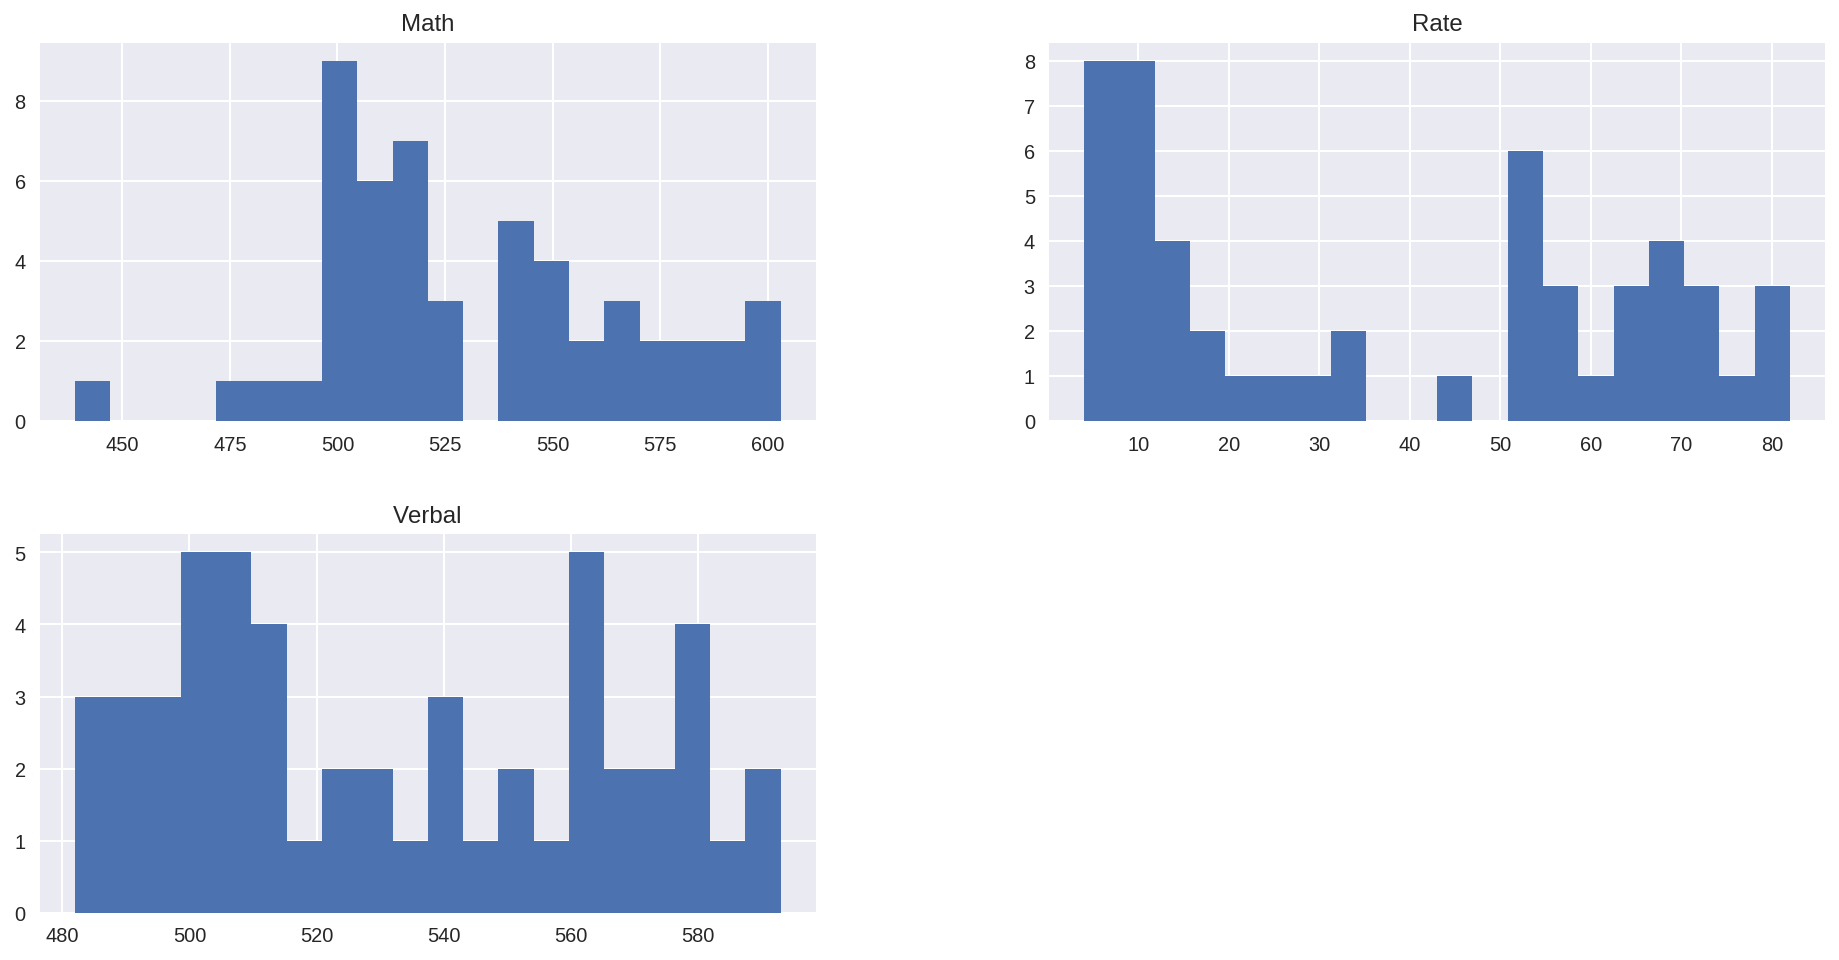

In [189]:
_ = sat_scores_df.hist(figsize=(16,8),bins=20)

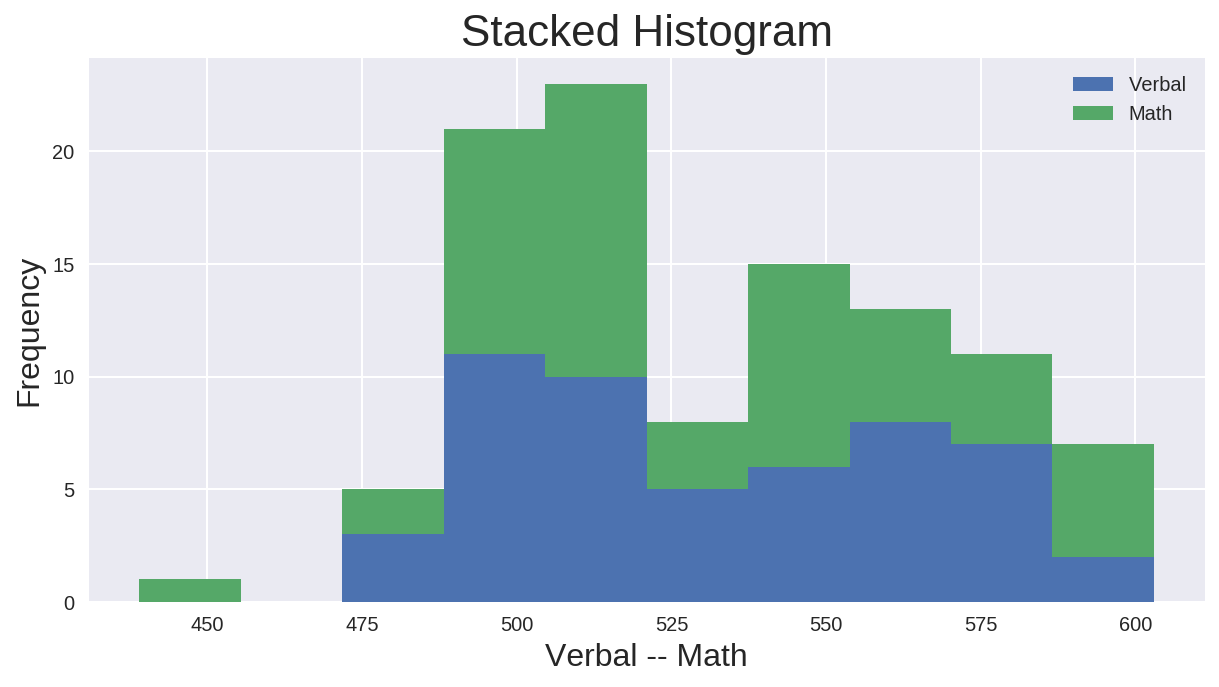

In [190]:
ax = sat_scores_df[["Verbal","Math"]].plot(kind= "hist", stacked=True , figsize=(10,5))
ax.set_title('Stacked Histogram', fontsize=22)
# x-axis labels
ax.set_xlabel('Verbal -- Math', fontsize=16)

# y-axis labels
ax.set_ylabel('Frequency', fontsize=16)

ax.legend(loc=1)



### Plot `Verbal` and `Math` on the same chart using boxplots

In [191]:
sat_scores_df["Rate"].min()

4

In [192]:
sat_scores_df["Rate"].max()

82

Rate values are not in the same scale as Verbal and Math scores as we see. ploting these all on the same plot, without scaling would be meaningless.

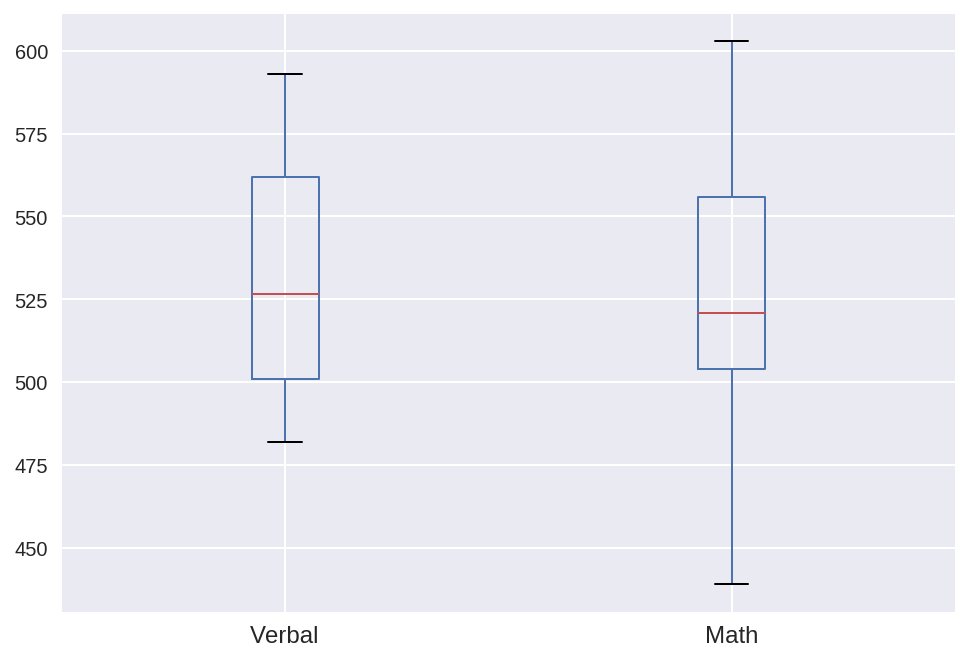

In [193]:
_ = sat_scores_df[["Verbal","Math"]].boxplot()

### Plot `Verbal`, `Math`, and `Rate` after Scaling (appropriately on the same boxplot chart)

In [195]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Verbal_scaled = scaler.fit_transform(sat_scores_df['Verbal'])
Math_scaled = scaler.fit_transform(sat_scores_df['Math'])



/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if

In [196]:
#have to change the scaled seiries into a df to plot it.
column_names = ["Verbal","Math","Rate"]
sat_scores_scaled_df = pd.DataFrame(scaler.fit_transform(sat_scores_df[["Verbal","Math","Rate"]]),
                                    columns= column_names)

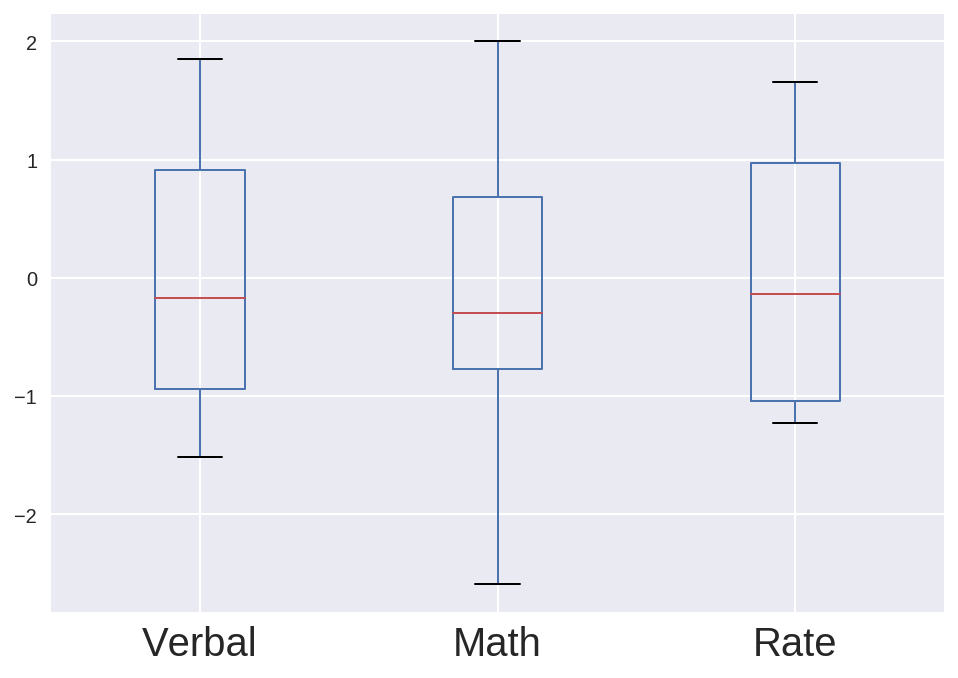

In [197]:

_=sat_scores_scaled_df.boxplot(fontsize=20)

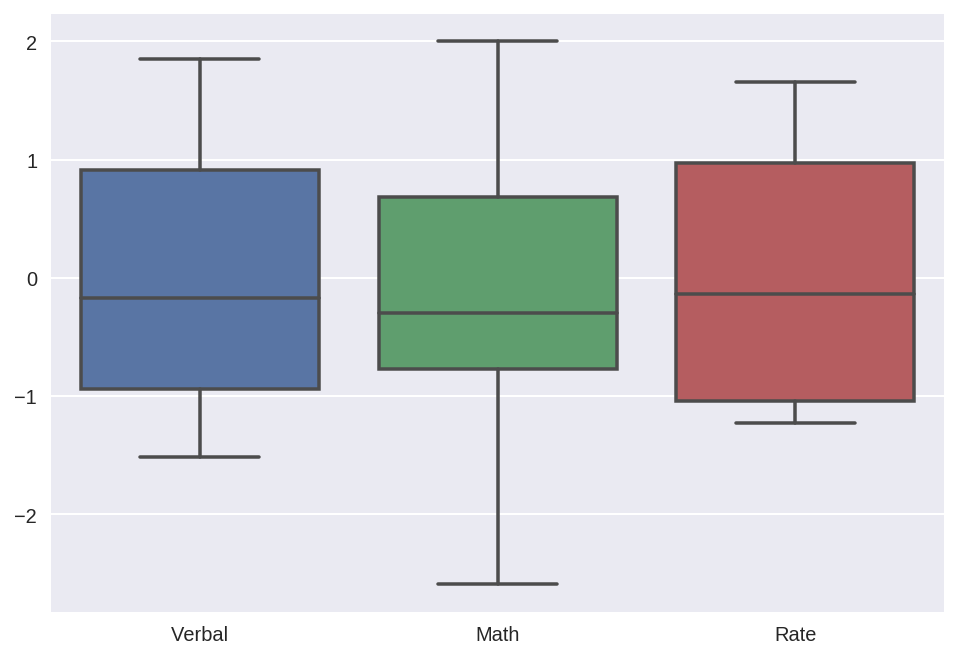

In [198]:
_ =sns.boxplot(data = sat_scores_scaled_df )


## Create and examine subsets of the data

### Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

In [200]:
sat_scores_df["Verbal"].mean()

532.01923076923072

In [36]:
sat_scores_df["verbal_above_mean"]= sat_scores_df["Verbal"] > 532.019

* only 24 of the Verbal scores are above the mean score.

In [40]:
sat_scores_df["verbal_above_mean"].sum()

24

In [41]:
sat_scores_df["verbal_above_mean"].value_counts()

False    28
True     24
Name: verbal_above_mean, dtype: int64

* limitting only where the Verbal scores are above mean!

In [56]:
sat_scores_df_verbal_mean= sat_scores_df[sat_scores_df["verbal_above_mean"] == True]

In [58]:
sat_scores_df_verbal_mean.head()

,State,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median
26,CO,31,539,542,True,True
27,OH,26,534,439,True,True
28,MT,23,539,539,True,True
30,ID,17,543,542,True,True
31,TN,13,562,553,True,True


* List of the states where the verbal scores are above mean.

In [61]:
states_verbal_above_mean = sat_scores_df_verbal_mean["State"].unique()
states_verbal_above_mean

array(['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN',
       'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD',
       'ND', 'MS'], dtype=object)

In [38]:
sat_scores_df.head()

,State,Rate,Verbal,Math,verbal_above_mean
0,CT,82,509,510,False
1,NJ,81,499,513,False
2,MA,79,511,515,False
3,NY,77,495,505,False
4,NH,72,520,516,False


In [39]:
sat_scores_df["verbal_above_mean"][:10]


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: verbal_above_mean, dtype: bool

In [42]:
sat_scores_df["Verbal"].median()

526.5

In [43]:
sat_scores_df["Verbal_above_median"] = sat_scores_df["Verbal"]  > 526.5

In [207]:
sat_scores_df.head()

,State,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median
0,CT,82,509,510,False,False
1,NJ,81,499,513,False,False
2,MA,79,511,515,False,False
3,NY,77,495,505,False,False
4,NH,72,520,516,False,False


In [208]:
sat_scores_df["Verbal_above_median"][:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Verbal_above_median, dtype: bool

In [209]:
sat_scores_df["Verbal_Math_difference"] = sat_scores_df["Verbal"] - sat_scores_df["Math"]

In [210]:
sat_scores_df.head()

,State,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
0,CT,82,509,510,False,False,-1
1,NJ,81,499,513,False,False,-14
2,MA,79,511,515,False,False,-4
3,NY,77,495,505,False,False,-10
4,NH,72,520,516,False,False,4


In [211]:
sat_scores_df["Verbal_Math_difference"][:10]

0    -1
1   -14
2    -4
3   -10
4     4
5     2
6     1
7     5
8     6
9     9
Name: Verbal_Math_difference, dtype: int64

### Create two new DataFrames showing states with the greatest difference between scores

In [212]:
#to get the 10 greater we have to sort the df first
sat_scores_sorted_df = sat_scores_df.sort_values("Verbal_Math_difference",ascending= False)
sat_scores_sorted_df.head()

,State,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
27,OH,26,534,439,True,True,95
50,MS,4,566,551,True,True,15
29,WV,18,527,512,False,True,15
45,AR,6,562,550,True,True,12
32,NM,13,551,542,True,True,9


In [213]:
verbal_greater_math = sat_scores_sorted_df.head(10)
verbal_greater_math.head(3)

,State,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
27,OH,26,534,439,True,True,95
50,MS,4,566,551,True,True,15
29,WV,18,527,512,False,True,15


In [214]:
type(verbal_greater_math)

pandas.core.frame.DataFrame

In [215]:
sat_scores_inverse_df = sat_scores_df.sort_values("Verbal_Math_difference",ascending= True)
sat_scores_inverse_df.head(3)

,State,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
21,HI,52,485,515,False,False,-30
23,CA,51,498,517,False,False,-19
1,NJ,81,499,513,False,False,-14


In [216]:
math_greater_verbal = sat_scores_inverse_df.head(10)
math_greater_verbal.head(3)

,State,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
21,HI,52,485,515,False,False,-30
23,CA,51,498,517,False,False,-19
1,NJ,81,499,513,False,False,-14


## Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### Create the correlation matrix of your variables (excluding `State`).


In [217]:
sat_scores_df.columns

Index([u'State', u'Rate', u'Verbal', u'Math', u'verbal_above_mean',
       u'Verbal_above_median', u'Verbal_Math_difference'],
      dtype='object')

In [218]:
#excluding the state column

sat_no_state_df1= sat_scores_df.drop("State",axis=1)

In [219]:
sat_no_state_df1.head()

,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
0,82,509,510,False,False,-1
1,81,499,513,False,False,-14
2,79,511,515,False,False,-4
3,77,495,505,False,False,-10
4,72,520,516,False,False,4


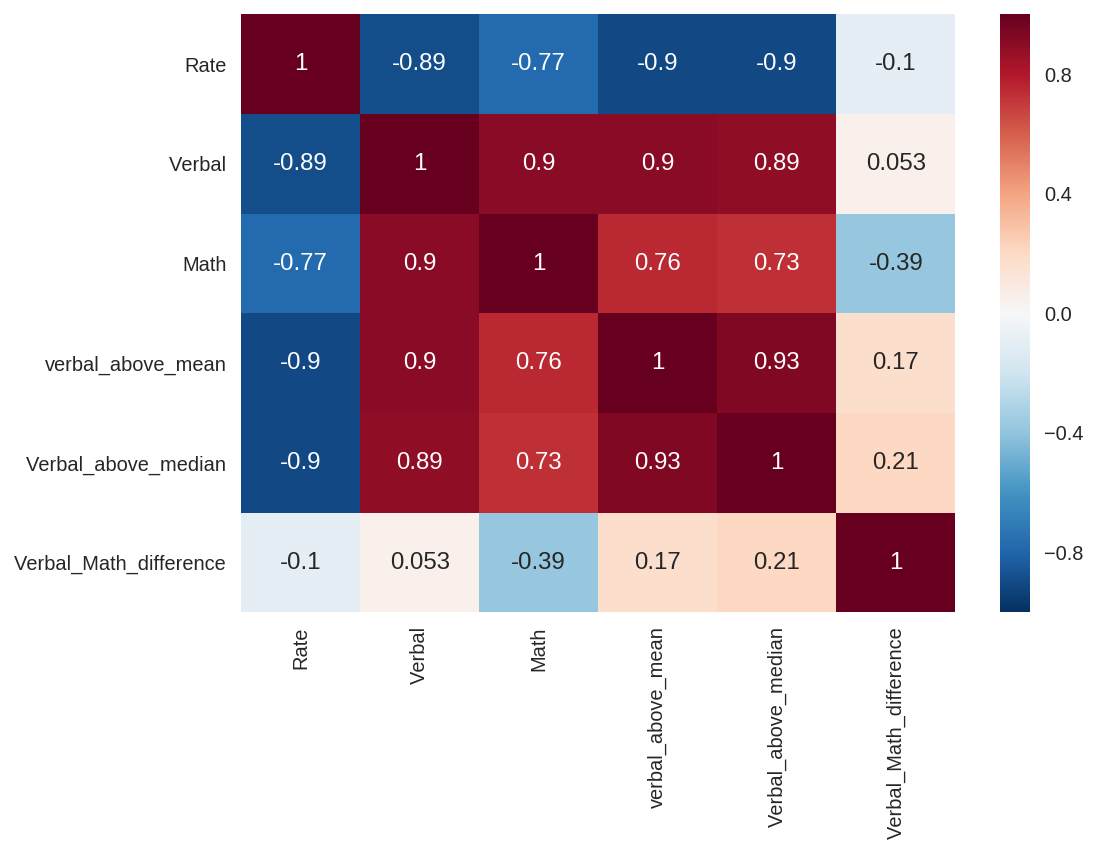

In [220]:
#correlation matrix of SAT excluding state column

sat_no_state_df_corr = sat_no_state_df1.corr()

#the heatmap correlation matrix of SAT excluding state column
_=sns.heatmap(sat_no_state_df_corr , annot=True)
#_ is to asign that plot info to, so it it wont show it

In [221]:
sat_no_state_df1.describe()

,Rate,Verbal,Math,Verbal_Math_difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


    Correlation is a scaled version of covariance. 

    corr(x,y) = cov(x,y) / sd(x).sd(y) ====> Standardized the x & y values.

    Correlation gives you the numbers between -1 and 1, which is ascaled version of your values & values
    can be compared. You'll have a meaningfull visualization.

In [223]:
sat_no_state_df_corr = sat_no_state_df1.corr()
type(sat_no_state_df_corr)

pandas.core.frame.DataFrame

In [224]:
sat_no_state_df1.head(2)

,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
0,82,509,510,False,False,-1
1,81,499,513,False,False,-14


In [225]:
sat_float = sat_no_state_df1["verbal_above_mean"].apply(lambda x:float(x))
sat_float.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: verbal_above_mean, dtype: float64

In [226]:
sat_no_state_df1["verbal_above_mean"] = sat_float

In [227]:
sat_no_state_df1.head(2)

,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
0,82,509,510,0.0,False,-1
1,81,499,513,0.0,False,-14


In [228]:
sat_float1 = sat_no_state_df1["Verbal_above_median"].apply(lambda x:float(x))
sat_float1.head(2)

0    0.0
1    0.0
Name: Verbal_above_median, dtype: float64

In [229]:
#to replace the changed column
sat_no_state_df1["Verbal_above_median"] = sat_float1
sat_no_state_df1.head(2)

,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
0,82,509,510,0.0,0.0,-1
1,81,499,513,0.0,0.0,-14


In [230]:
# change the boolean type columns into float to make the covariance matrix

In [231]:
sat_cov = sat_no_state_df1.cov()
sat_cov

,Rate,Verbal,Math,verbal_above_mean,Verbal_above_median,Verbal_Math_difference
Rate,745.387632,-804.355958,-760.803922,-12.366516,-12.431373,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,15.069382,14.872549,27.499623
Math,-760.803922,1077.147059,1297.078431,13.705882,13.235294,-219.931373
verbal_above_mean,-12.366516,15.069382,13.705882,0.253394,0.235294,1.363499
Verbal_above_median,-12.431373,14.872549,13.235294,0.235294,0.254902,1.637255
Verbal_Math_difference,-43.552036,27.499623,-219.931373,1.363499,1.637255,247.430995


## Performing EDA on "drug use by age" data.

---
The "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.


    There were some missing values, which in some cases I replaced them with the mean of the column.

In [9]:
drug_raw_df = pd.read_csv('./data/drug-use-by-age.csv')

In [10]:
drug_raw_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [11]:
drug_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [14]:
drug_df["meth-frequency"].value_counts()

12.0     2
-        2
30.0     2
104.0    1
36.0     1
2.0      1
24.0     1
46.0     1
48.0     1
54.0     1
105.0    1
21.0     1
10.5     1
5.0      1
Name: meth-frequency, dtype: int64

In [13]:
# dropping the n column
drug_df = drug_raw_df.drop("n",axis=1)
drug_df.head(2)

,age,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0


In [15]:
drug_df.get_dtype_counts()

float64    20
object      7
dtype: int64

In [16]:
drug_df.columns

Index([u'age', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

In [17]:
object_col = ["age","crack-frequency","cocaine-frequency","heroin-frequency","inhalant-frequency",
              "oxycontin-frequency","meth-frequency"]
drug_df.isnull().any()

age                        False
alcohol-use                False
alcohol-frequency          False
marijuana-use              False
marijuana-frequency        False
cocaine-use                False
cocaine-frequency          False
crack-use                  False
crack-frequency            False
heroin-use                 False
heroin-frequency           False
hallucinogen-use           False
hallucinogen-frequency     False
inhalant-use               False
inhalant-frequency         False
pain-releiver-use          False
pain-releiver-frequency    False
oxycontin-use              False
oxycontin-frequency        False
tranquilizer-use           False
tranquilizer-frequency     False
stimulant-use              False
stimulant-frequency        False
meth-use                   False
meth-frequency             False
sedative-use               False
sedative-frequency         False
dtype: bool

In [18]:
drug_df.shape

(17, 27)

In [19]:
#turn objest cols to float

drug_df = drug_df.replace(np.nan," ", regex=True)
drug_df["age"] = pd.to_numeric(drug_df["age"], errors="coerce")
drug_df["crack-frequency"] = pd.to_numeric(drug_df["crack-frequency"] , errors="coerce")
drug_df["cocaine-frequency"] = pd.to_numeric(drug_df["cocaine-frequency"] , errors="coerce")
drug_df["heroin-frequency"] = pd.to_numeric(drug_df["heroin-frequency"] , errors="coerce")
drug_df["inhalant-frequency"] = pd.to_numeric(drug_df["inhalant-frequency"] , errors="coerce")
drug_df["oxycontin-frequency"] = pd.to_numeric(drug_df["oxycontin-frequency"], errors="coerce")
drug_df["meth-frequency"] = pd.to_numeric(drug_df["meth-frequency"], errors="coerce")

#drug_df = drug_df.replace(np.nan,' ', regex=True)


drug_df.dtypes

age                        float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

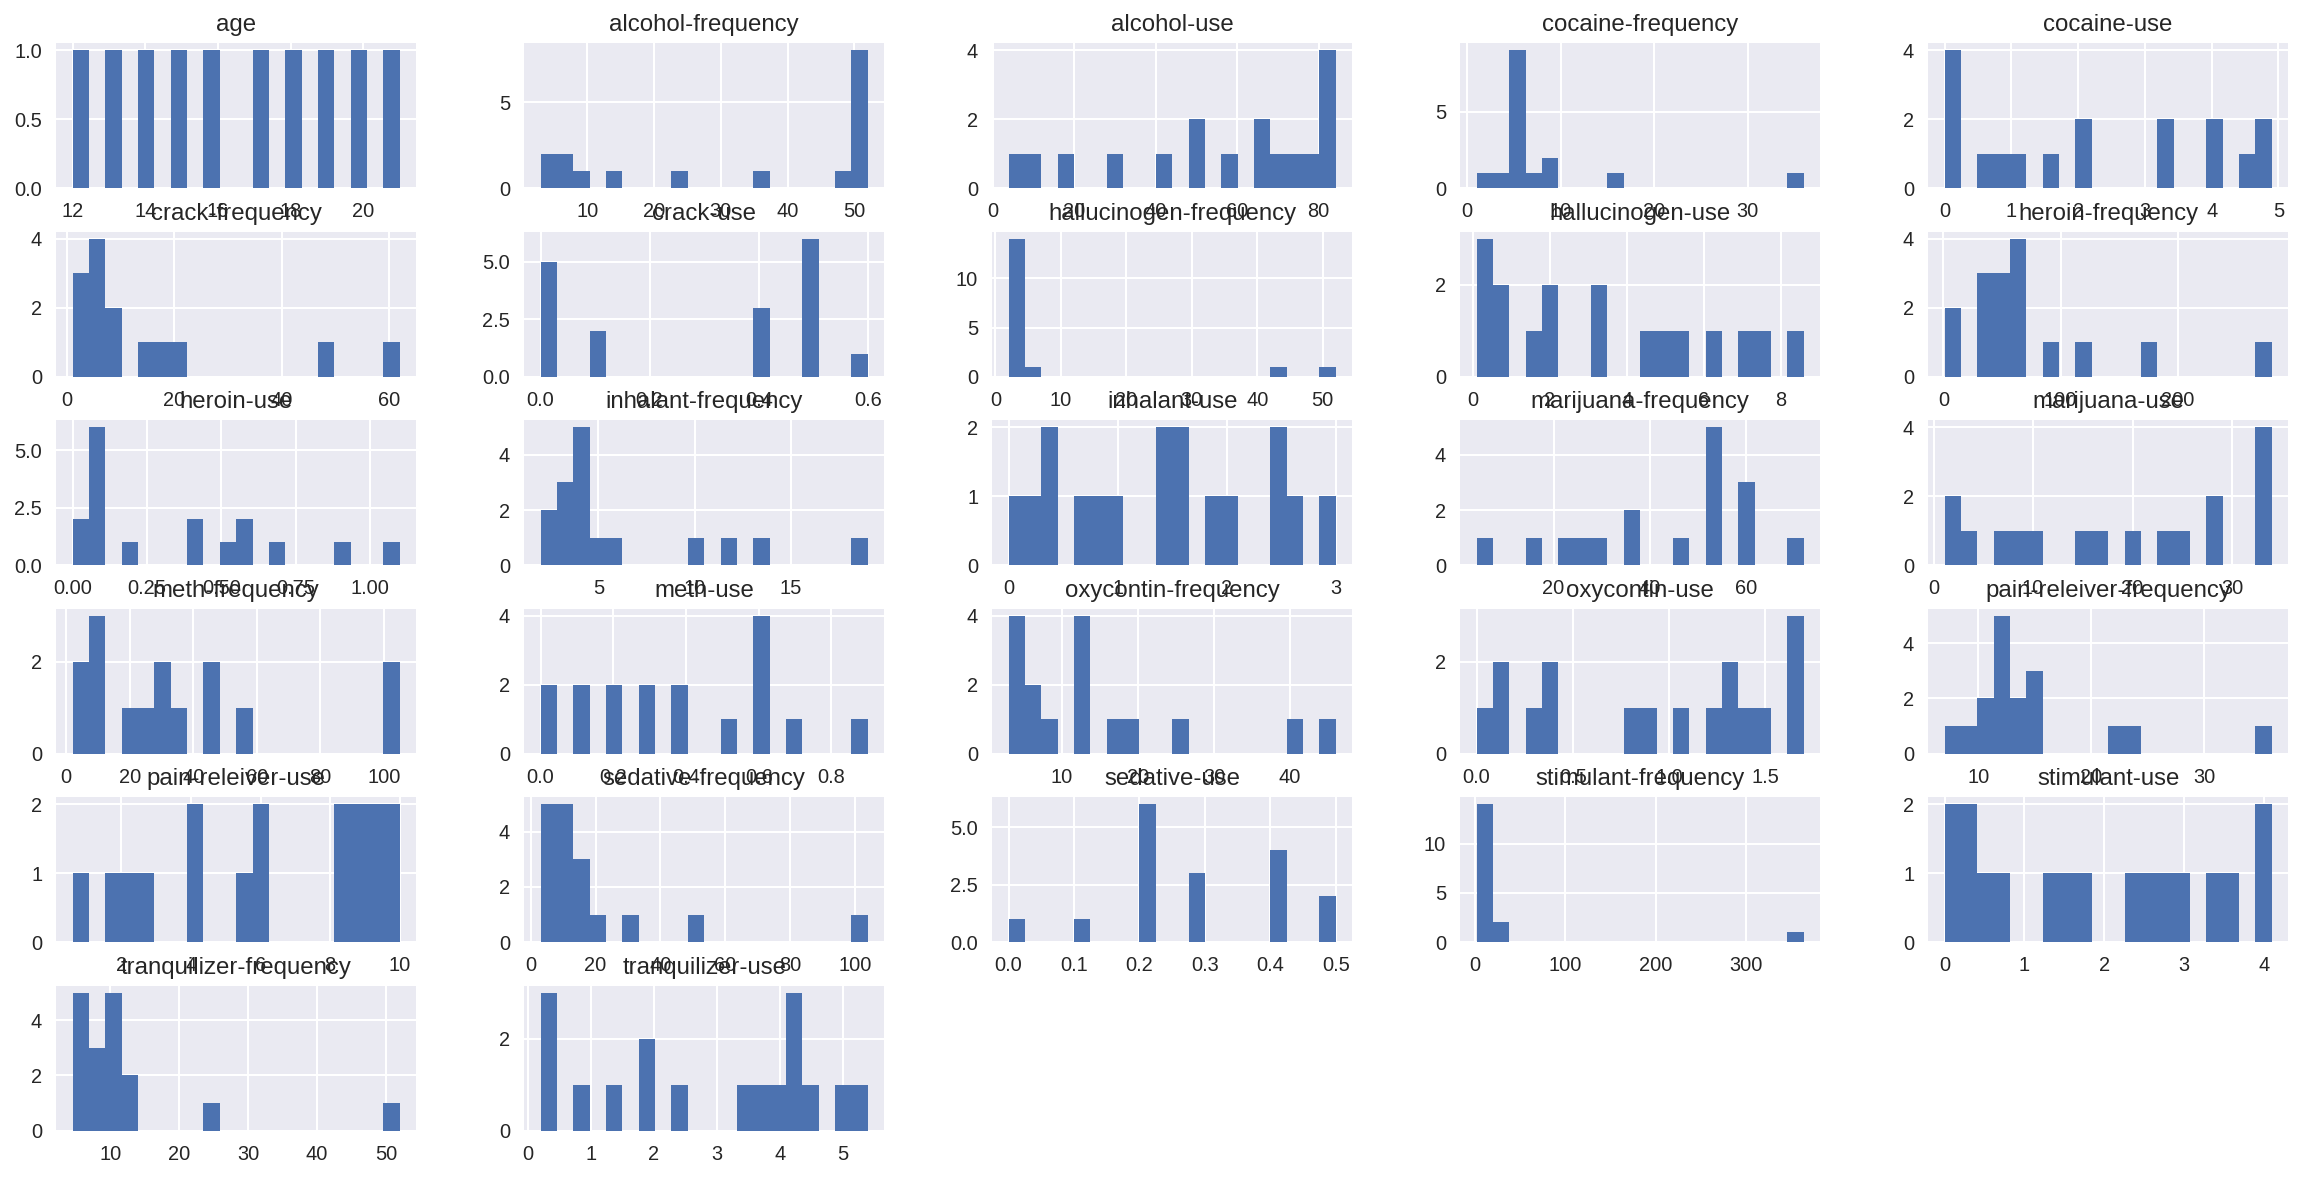

In [20]:
_ = drug_df.hist(figsize=(20,10),bins=20)

In [21]:
import matplotlib.pyplot as plt


In [22]:
# replacing the nan values with the mean of the column

drug_df["crack-frequency"] = drug_df["crack-frequency"].fillna(drug_df["crack-frequency"].mean())
drug_df["heroin-frequency"] = drug_df["heroin-frequency"].fillna(drug_df["heroin-frequency"].mean())
drug_df["inhalant-frequency"] = drug_df["inhalant-frequency"].fillna(drug_df["inhalant-frequency"].mean())
drug_df["oxycontin-frequency"] = drug_df["oxycontin-frequency"].fillna(drug_df["oxycontin-frequency"].mean())
drug_df["meth-frequency"] = drug_df["meth-frequency"].fillna(drug_df["meth-frequency"].mean())
#drug_df["meth-frequency"].unique

In [23]:
drug_df["cocaine-frequency"] = drug_df["cocaine-frequency"].fillna(drug_df["cocaine-frequency"].mean())

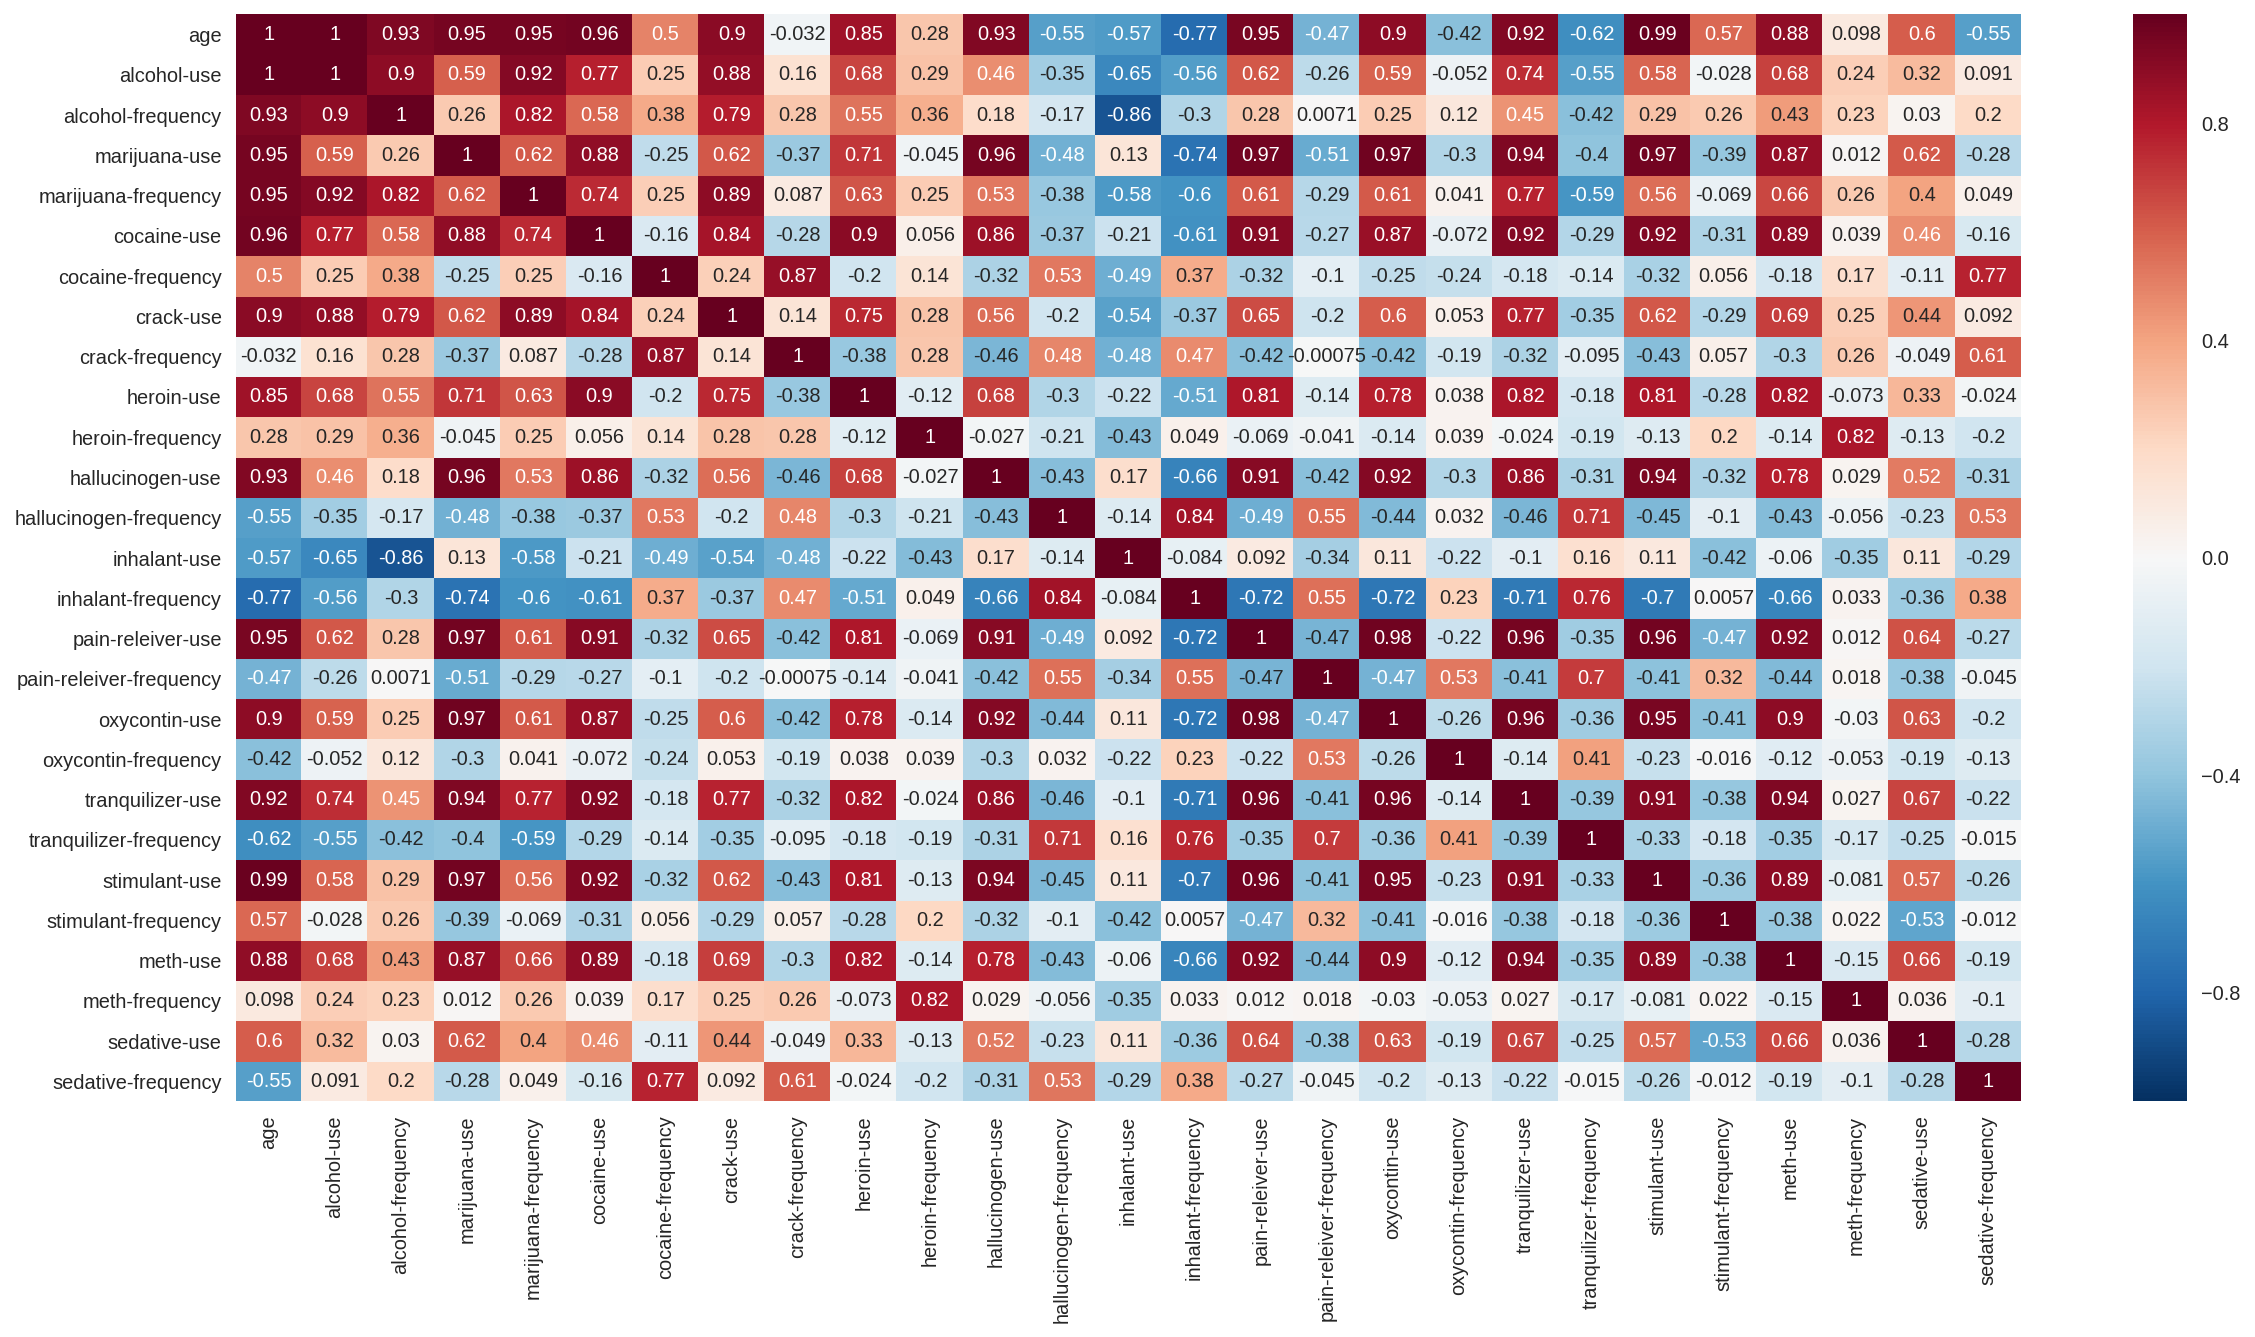

In [24]:
drug_df_corr = drug_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

_=sns.heatmap(drug_df_corr , annot=True)

## Top 5 corealated with Age: 
### Alcohol(%100), Stimulant(%99), Cocaine(%96), Marijuana(%95), Pain-releiver(%95)
---                             

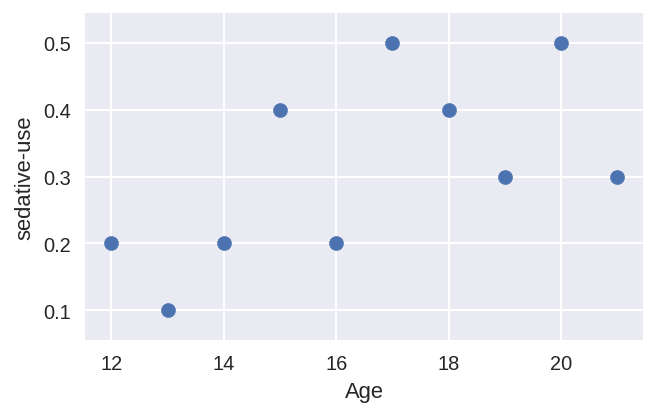

In [249]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["sedative-use"])

plt.xlabel("Age")
plt.ylabel("sedative-use")
#plt.legend()
plt.show()

In [250]:
drug_df["sedative-use"].max()

0.5

*  sedative use in age 18 ==> %0.4  and highest percentage of use in age 17 & 20 ==> %0.5

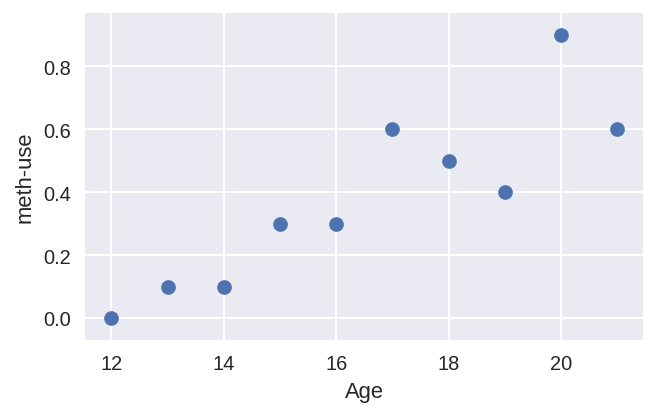

In [251]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["meth-use"])
plt.xlabel("Age")
plt.ylabel("meth-use")
#plt.legend()
plt.show()

In [252]:
drug_df["meth-use"].max()

0.90000000000000002

   *  meth use in age 18 ==> %0.5  and highest percentage of use in age 20 ==> %0.9

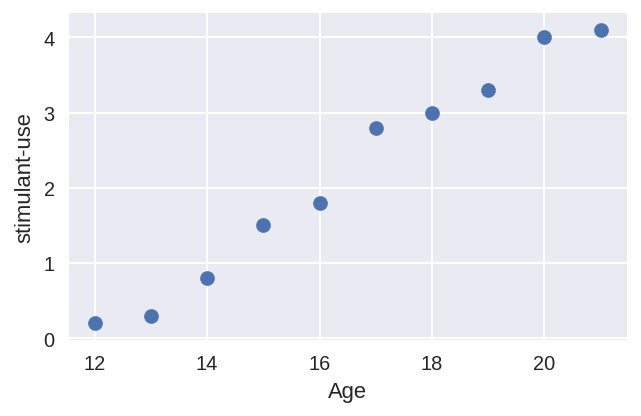

In [253]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["stimulant-use"])
plt.xlabel("Age")
plt.ylabel("stimulant-use")
#plt.legend()
plt.show()

In [254]:
drug_df["stimulant-use"].max()

4.0999999999999996

 *    stimulant use in age 18 ==> %3  and highest percentage of use in age 20 & after ==> %4.1

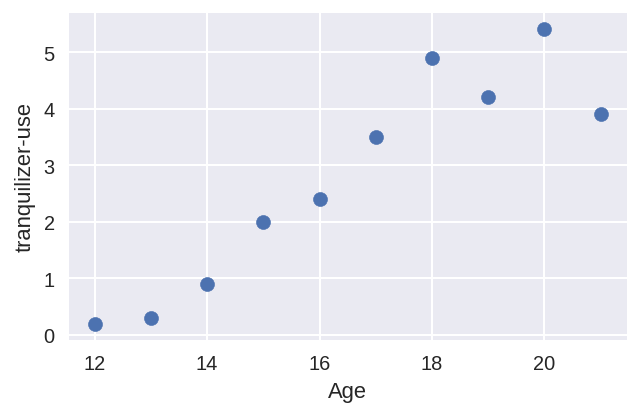

In [255]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["tranquilizer-use"])
plt.xlabel("Age")
plt.ylabel("tranquilizer-use")
#plt.legend()
plt.show()

In [256]:
drug_df["tranquilizer-use"].max()

5.4000000000000004

*       tranquilizer use in age 18 ==> %5  and highest percentage of use in age 20 ==> %5.4

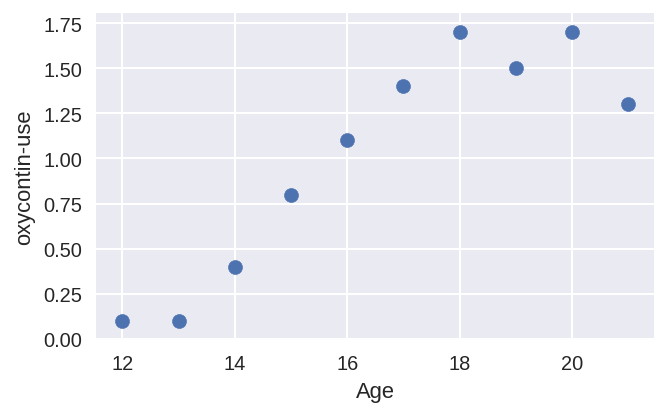

In [257]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["oxycontin-use"])
plt.xlabel("Age")
plt.ylabel("oxycontin-use")
#plt.legend()
plt.show()

In [258]:
drug_df["oxycontin-use"].max()

1.7

*     oxycotin use in age 18 ==> %1.7  and highest percentage of use in age 18 & 20 ==> %1.7

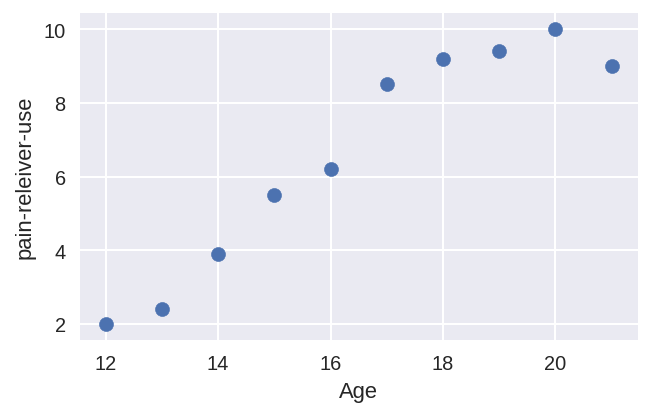

In [259]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["pain-releiver-use"])
plt.xlabel("Age")
plt.ylabel("pain-releiver-use")
#plt.legend()
plt.show()

In [260]:
drug_df["pain-releiver-use"].max()

10.0

*    pain releiver use in age 18 ==> %9  and highest percentage of use in age 20 ==> %10

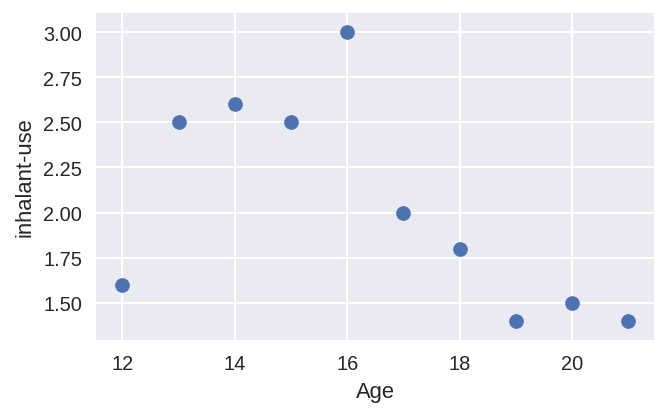

In [261]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["inhalant-use"])
plt.xlabel("Age")
plt.ylabel("inhalant-use")
#plt.legend()
plt.show()


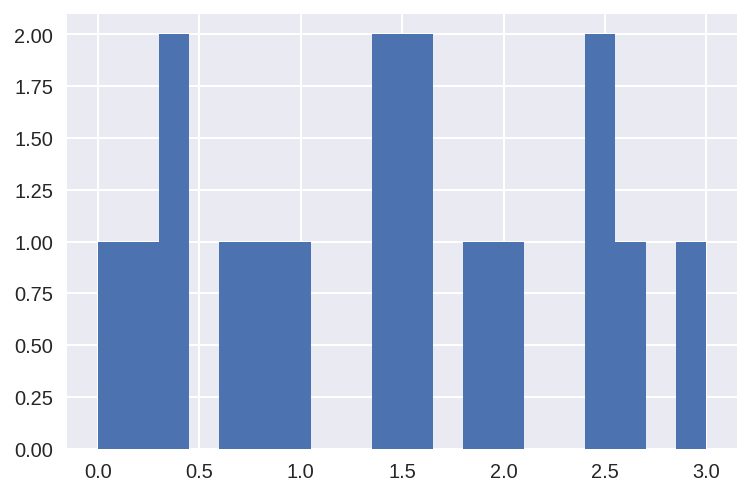

In [10]:
plt.hist(x=drug_df["inhalant-use"],bins=20)
plt.show()
#drug_df["inhalant-use"].plot(kind= "hist")

In [262]:
drug_df["inhalant-use"].max()

3.0

*    inhalant use in age 18 ==> %1.75  and highest percentage of use in age 16 ==> %3

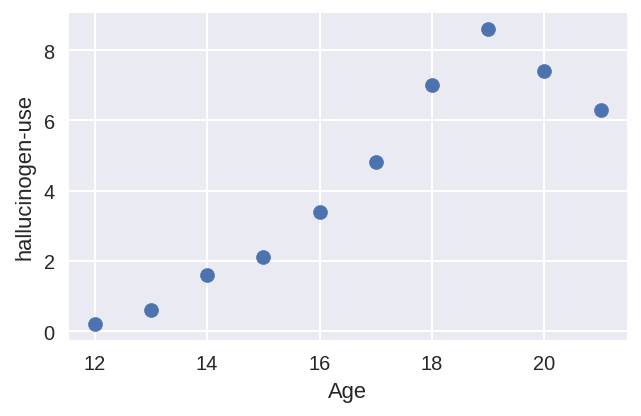

In [263]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["hallucinogen-use"])
plt.xlabel("Age")
plt.ylabel("hallucinogen-use")
#plt.legend()
plt.show()

In [264]:
drug_df["hallucinogen-use"].max()

8.5999999999999996

*    hallucigen use in age 18 ==> %6.5  and highest percentage of use in age 19 ==> %8.6

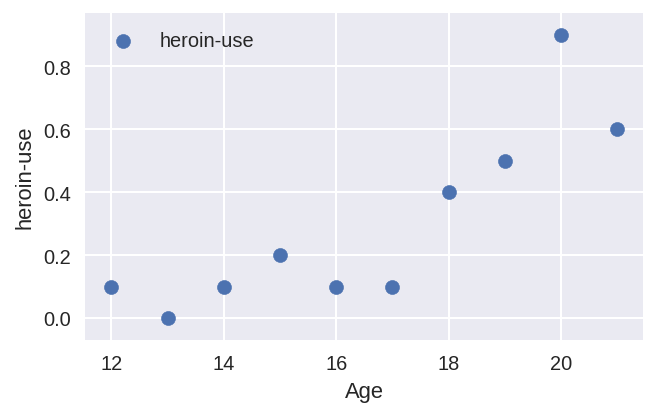

In [265]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["heroin-use"])
plt.xlabel("Age")
plt.ylabel("heroin-use")
plt.legend()
plt.show()

In [266]:
drug_df["heroin-use"].max()

1.1000000000000001

*    heroin use in age 18 ==> %0.4  and highest percentage of use in age 20 ==> %1.1

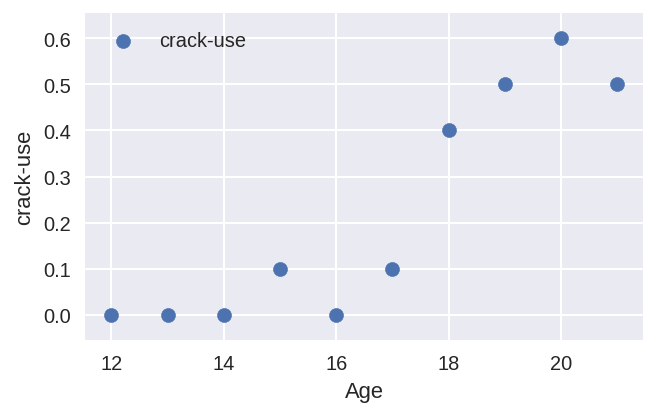

In [267]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["crack-use"])
plt.xlabel("Age")
plt.ylabel("crack-use")
plt.legend()
plt.show()

In [268]:
drug_df["crack-use"].max()

0.59999999999999998

 *    crack use in age 18 ==> %0.4  and highest percentage of use in age 20 ==> %0.6

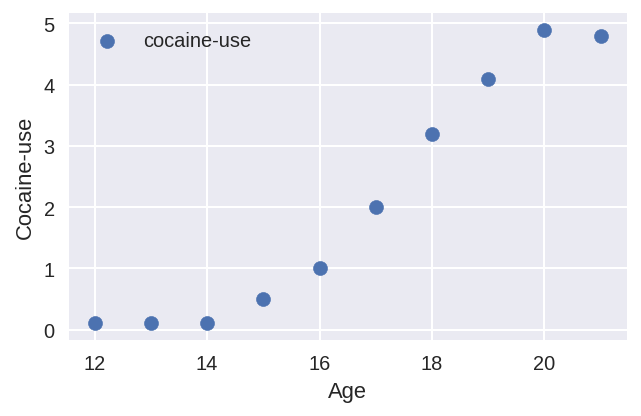

In [269]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["cocaine-use"])
plt.xlabel("Age")
plt.ylabel("Cocaine-use")
plt.legend()
plt.show()

In [270]:
drug_df["cocaine-use"].max()

4.9000000000000004

*      cocaine use in age 18 ==> %3.1  and highest percentage of use in age 20 ==> %4.9

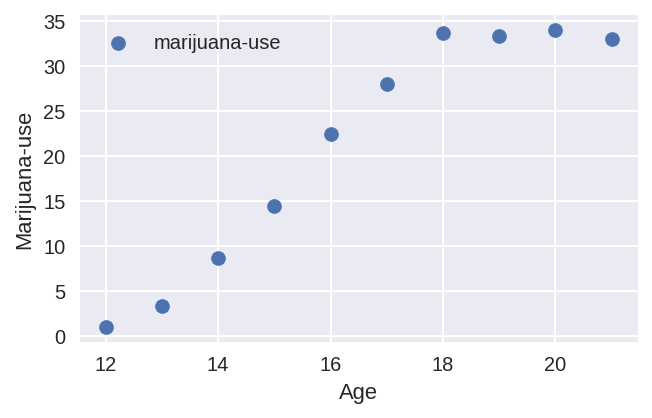

In [271]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["marijuana-use"])
plt.xlabel("Age")
plt.ylabel("Marijuana-use")
plt.legend()
plt.show()

In [272]:
drug_df["marijuana-use"].max()

34.0

 *   marijuana use in age 18 ==> %34  and highest percentage of use in age 18 & after ==> %34

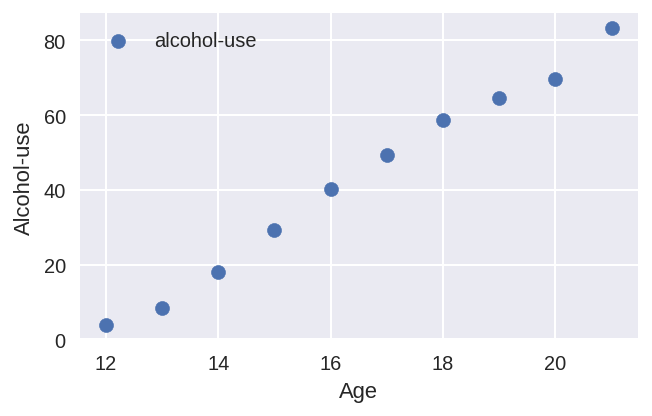

In [273]:
plt.figure(figsize=(5,3))
plt.scatter(x=drug_df["age"], y = drug_df["alcohol-use"])
plt.xlabel("Age")
plt.ylabel("Alcohol-use")
plt.legend()
plt.show()

*    acohol use in age 18 ==> %60  and highest percentage of use in age 21 ==> %80

In [274]:
drug_df.columns

Index([u'age', u'alcohol-use', u'alcohol-frequency', u'marijuana-use',
       u'marijuana-frequency', u'cocaine-use', u'cocaine-frequency',
       u'crack-use', u'crack-frequency', u'heroin-use', u'heroin-frequency',
       u'hallucinogen-use', u'hallucinogen-frequency', u'inhalant-use',
       u'inhalant-frequency', u'pain-releiver-use', u'pain-releiver-frequency',
       u'oxycontin-use', u'oxycontin-frequency', u'tranquilizer-use',
       u'tranquilizer-frequency', u'stimulant-use', u'stimulant-frequency',
       u'meth-use', u'meth-frequency', u'sedative-use', u'sedative-frequency'],
      dtype='object')

* scaling:

In [275]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Verbal_scaled = scaler.fit_transform(sat_scores_df['Verbal'])
drug_df["alcohol_scaled"] = scaler.fit_transform(drug_df["alcohol-use"])
drug_df["marijuana_scaled"] = scaler.fit_transform(drug_df["marijuana-use"])
drug_df["inhalant_scaled"] = scaler.fit_transform(drug_df["inhalant-use"])
drug_df["heroin_scaled"] = scaler.fit_transform(drug_df["heroin-use"])
drug_df["meth_scaled"] = scaler.fit_transform(drug_df["meth-use"])
drug_df["crack_scaled"] = scaler.fit_transform(drug_df["crack-use"])
drug_df["pain-releiver_scaled"] = scaler.fit_transform(drug_df["pain-releiver-use"])
drug_df["hallucinogen_scaled"] = scaler.fit_transform(drug_df["hallucinogen-use"])

/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/conda/envs/python2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if

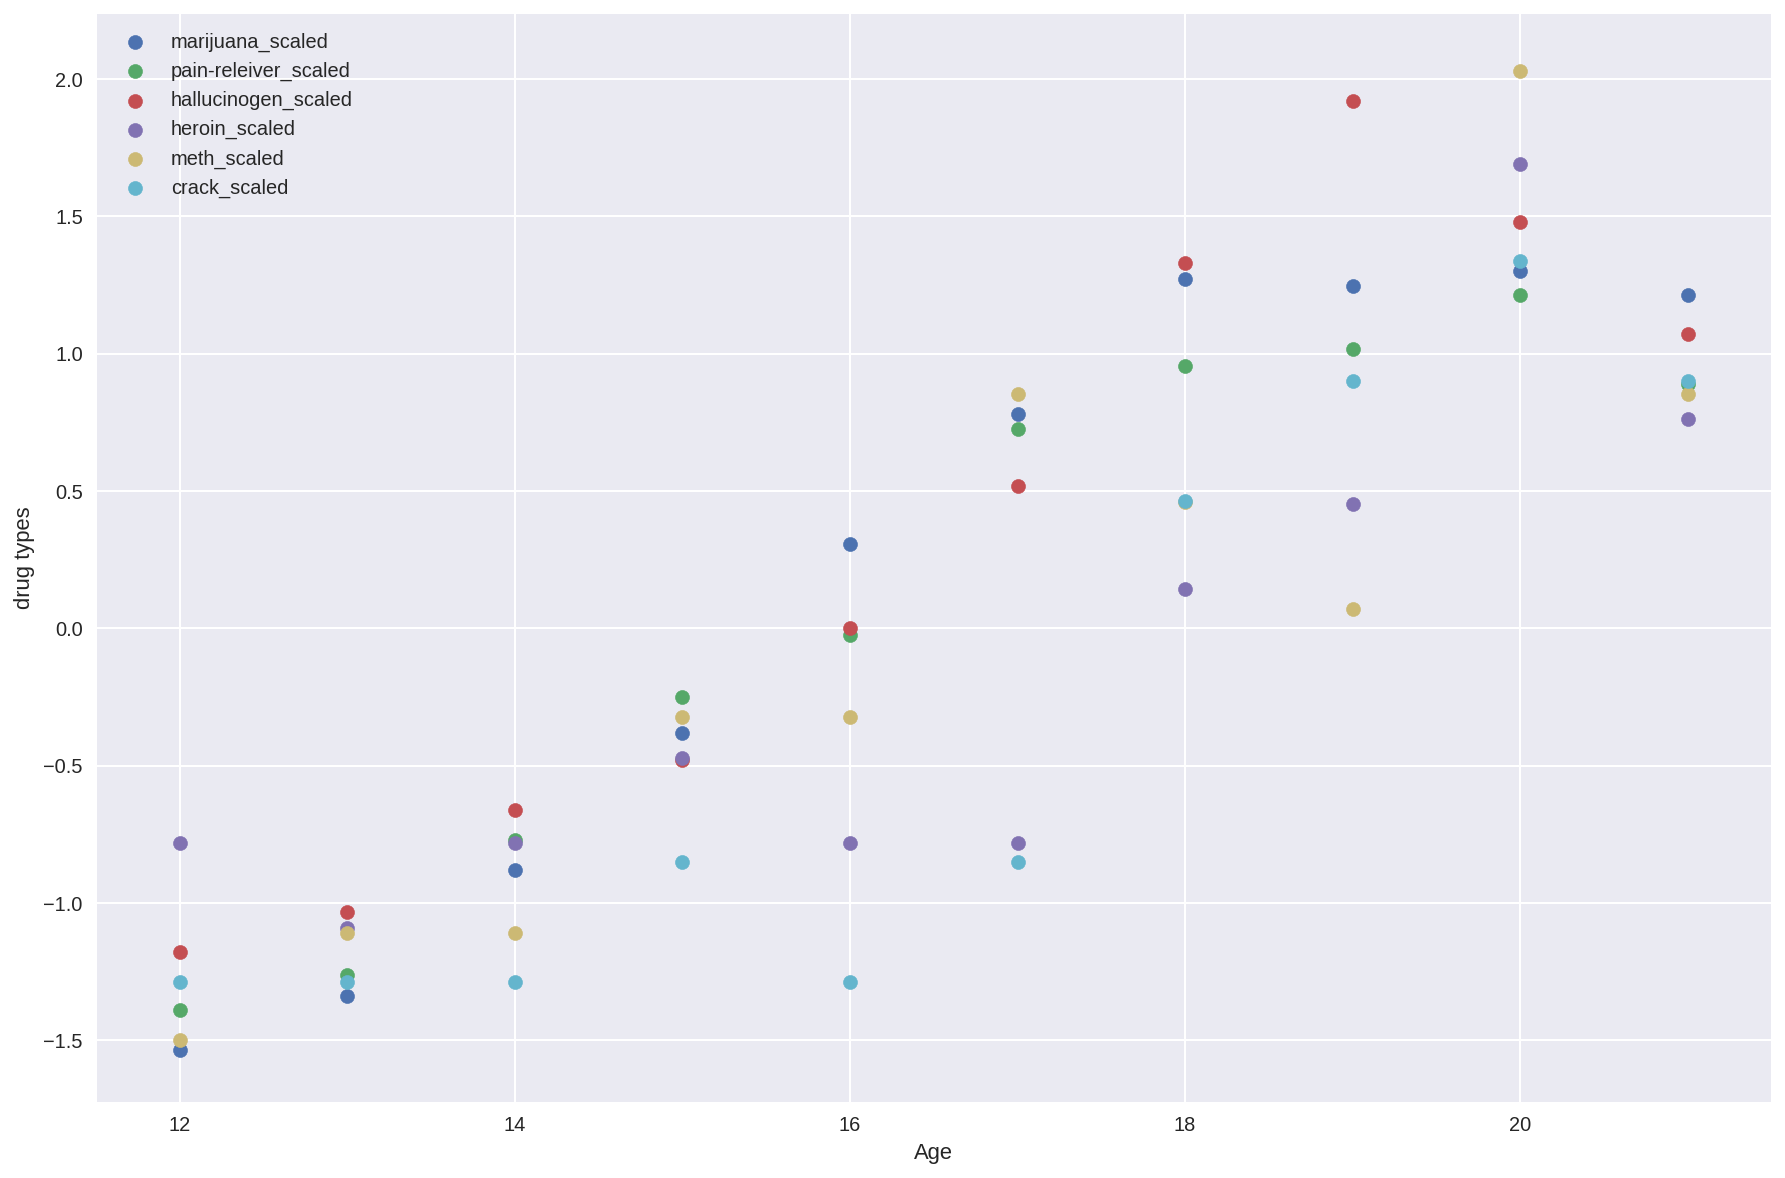

In [276]:
plt.figure(figsize=(15,10))
plt.scatter(x=drug_df["age"], y = drug_df["marijuana_scaled"])
plt.scatter(x=drug_df["age"], y = drug_df["pain-releiver_scaled"])
plt.scatter(x=drug_df["age"], y = drug_df["hallucinogen_scaled"])
plt.scatter(x=drug_df["age"], y = drug_df["heroin_scaled"])
plt.scatter(x=drug_df["age"], y = drug_df["meth_scaled"])
plt.scatter(x=drug_df["age"], y = drug_df["crack_scaled"])

plt.xlabel("Age")
plt.ylabel("drug types")
plt.legend(loc = 2)
plt.show()

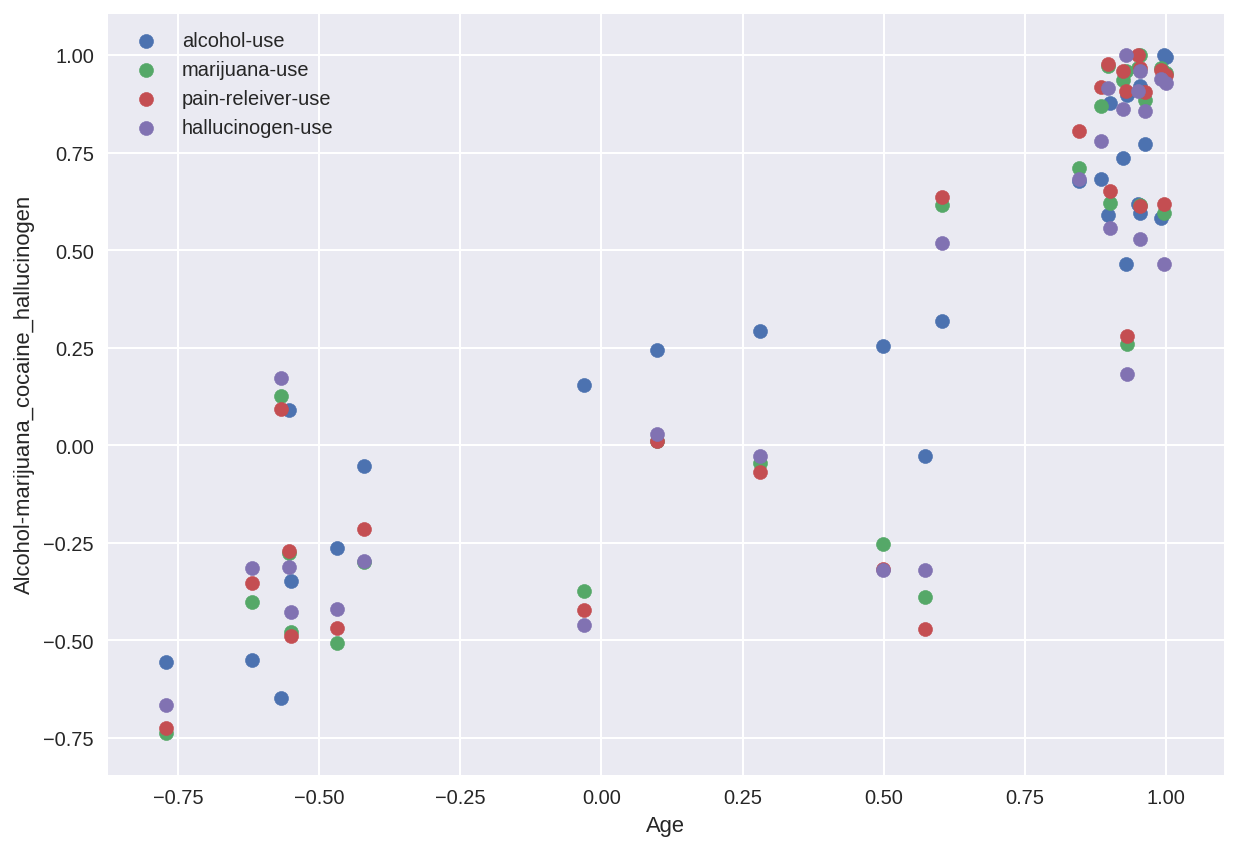

In [277]:
plt.figure(figsize=(10,7))
plt.scatter(x=drug_df_corr["age"], y = drug_df_corr["alcohol-use"])
plt.scatter(x=drug_df_corr["age"], y = drug_df_corr["marijuana-use"])
plt.scatter(x=drug_df_corr["age"], y = drug_df_corr["pain-releiver-use"])
plt.scatter(x=drug_df_corr["age"], y = drug_df_corr["hallucinogen-use"])
plt.xlabel("Age")
plt.ylabel("Alcohol-marijuana_cocaine_hallucinogen")
plt.legend()
plt.show()

### Testable hypothesis about this data

    Hypothesis : Is there a correlation between drug users age and the drug type?

**Report**



...

    After testing, examining and based on the EDA there are correlations between the drug users age & the drug type.
    As where accessibility  & punishment makes a huge difference in the drug use.
    All the results belong to under age drug users.
    The most common use is the Alcohol.
    The most popular drug is Marijuana.
    Pain relievers are the Second most popular drug type.
    Hallucinogen is the third most popular drug type.
    Least common drugs are Heroin, Meth and Crack.
    For inhalant drug types, the highest drug use percentage belongs to teenagers around 16 years old.


## Dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. 

In [278]:
#sat_scores_df["Verbal"].value_counts()

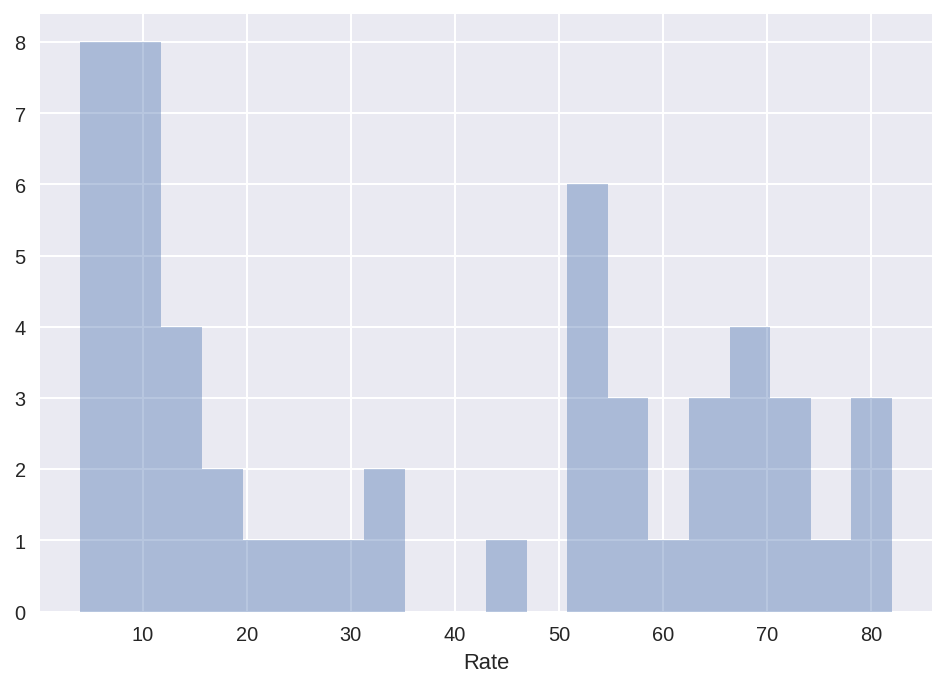

In [279]:
sns.set() 
x = sat_scores_df["Rate"]
ax = sns.distplot(x, kde=False, bins=20)

    There are no outliers in Rate or Verbal but in Math, the value 439 can be the outlier.

    A convenient definition of a outlier is a point which falls more than 1.5 times the interquartile range above 
    the third quartile or below the first quartile.

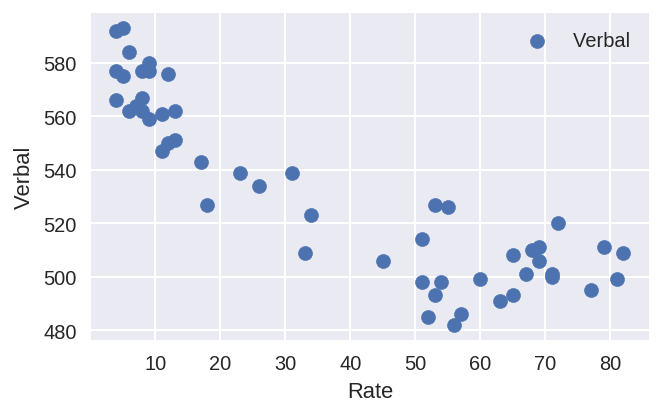

In [282]:
plt.figure(figsize=(5,3))
plt.scatter(x=sat_scores_df["Rate"], y = sat_scores_df["Verbal"])
plt.xlabel("Rate")
plt.ylabel("Verbal")
plt.legend()
plt.show()

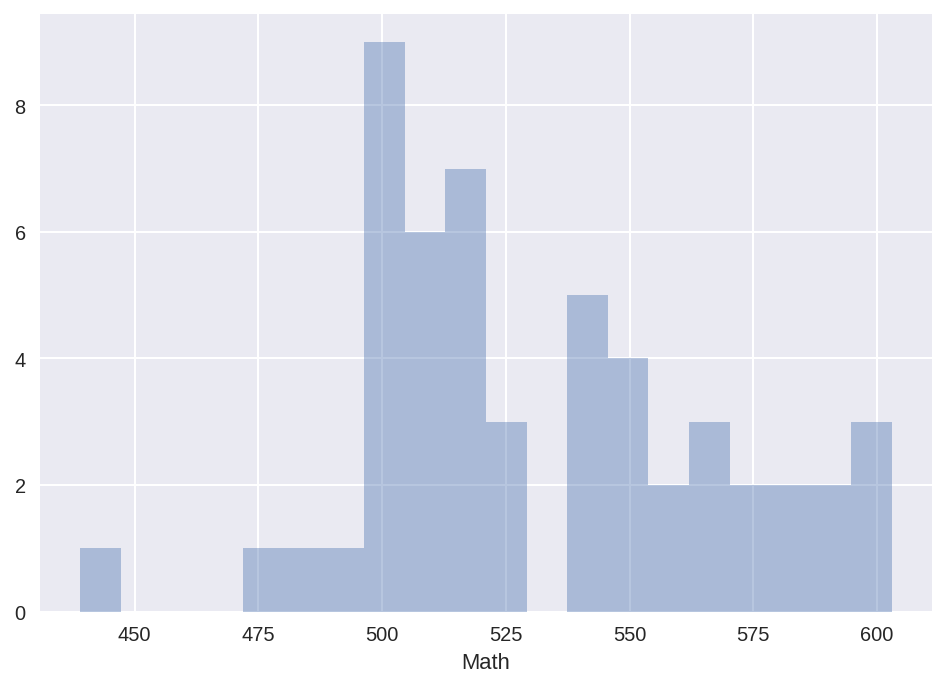

In [12]:
sns.set() 
x = sat_scores_df["Math"]
ax = sns.distplot(x, kde=False, bins=20)
#plt.hist(x,bins=20)
#plt.show()

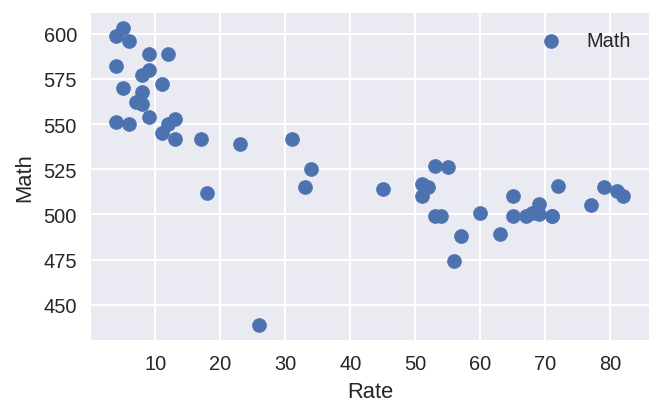

In [284]:
plt.figure(figsize=(5,3))
plt.scatter(x=sat_scores_df["Rate"], y = sat_scores_df["Math"])
plt.xlabel("Rate")
plt.ylabel("Math")
plt.legend()
plt.show()

In [285]:
sat_scores_df["Math"].value_counts()

499    6
510    3
515    3
542    3
550    2
501    2
589    2
527    1
474    1
599    1
596    1
514    1
570    1
525    1
526    1
582    1
517    1
516    1
577    1
513    1
539    1
551    1
545    1
572    1
603    1
488    1
489    1
554    1
580    1
561    1
562    1
500    1
553    1
439    1
568    1
505    1
506    1
512    1
Name: Math, dtype: int64

### Percentile scoring

In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

In [32]:
import scipy.stats as stats


In [33]:
column = sat_scores_df["Rate"]
#rate is each value in the Rate column
#since .apply takes only one argument and stat.percentileofscore takes two,
#defind a function that I can pass as argument in .apply


def get_percentile(rate):
    return stats.percentileofscore(column, rate)

In [34]:
sat_scores_df["rate_percentile"] = sat_scores_df["Rate"].apply(get_percentile)

In [35]:
sat_scores_df.head()

,State,Rate,Verbal,Math,rate_percentile
0,CT,82,509,510,100.000000
1,NJ,81,499,513,98.076923
2,MA,79,511,515,96.153846
3,NY,77,495,505,94.230769
4,NH,72,520,516,92.307692


In [290]:
print(sat_scores_df.loc[sat_scores_df['State'].isin(["CA"])])


   State  Rate  Verbal  Math verbal_above_mean Verbal_above_median  \
23    CA    51     498   517             False               False   

    Verbal_Math_difference  rate_percentile  
23                     -19        56.730769  


### Percentiles and outliers

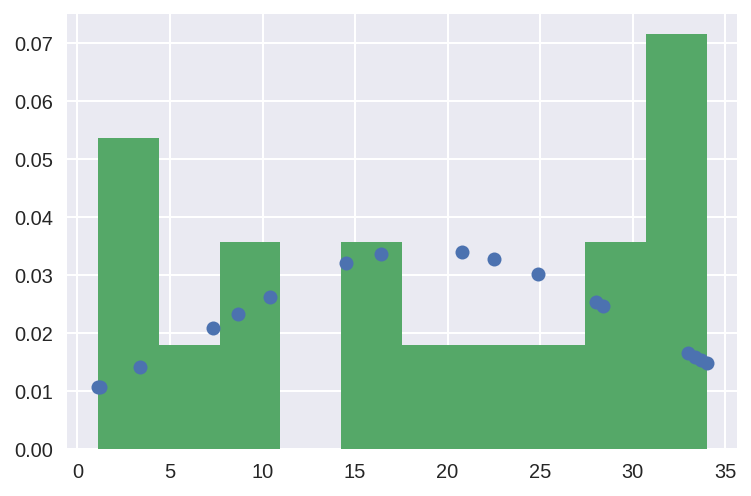

In [30]:
import pylab as pl

col = drug_df["marijuana-use"]

fit = stats.norm.pdf(col, np.mean(col), np.std(col))  #this is a fitting indeed

pl.plot(col,fit,'o')

pl.hist(col,normed=True, bins=10)      #use this to draw histogram of your data

pl.show()

In [293]:
column1 = drug_df["marijuana-use"]

def get_percentile(rate):
    return stats.percentileofscore(column1, rate)

In [36]:
drug_df["marijuana_percentile"] = drug_df["marijuana-use"].apply(get_percentile)

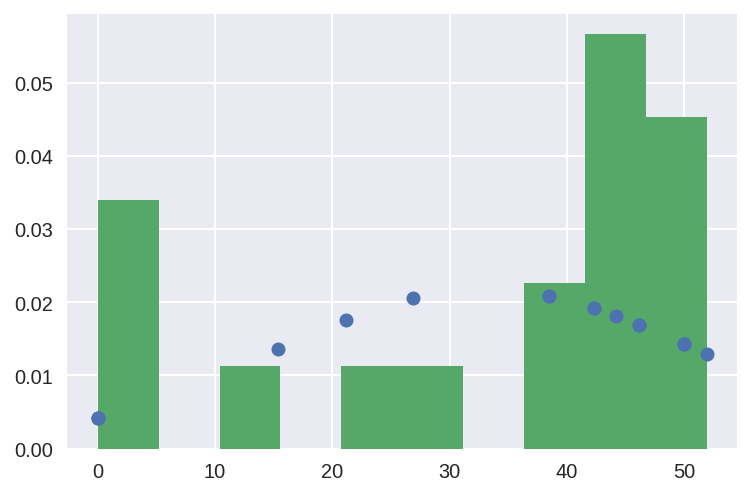

In [37]:
col = drug_df["marijuana_percentile"]


fit = stats.norm.pdf(col, np.mean(col), np.std(col))  #this is a fitting indeed

pl.plot(col,fit,'o')

pl.hist(col,normed=True, bins=10)      #use this to draw histogram of your data

pl.show()